# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data 
2. Cleaning the data 
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com). 

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [157]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-inside-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/trevor-noah-i-wish-you-would-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/jerry-seinfeld-23-hours-to-kill-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['ricky','louis', 'dave', 'bo', 'bill', 'trevor', 'john', 'vir', 'ali', 'anthony', 'jerry', 'joe']

In [158]:
urls

['http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
 'http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
 'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
 'https://scrapsfromtheloft.com/comedy/bo-burnham-inside-transcript/',
 'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
 'https://scrapsfromtheloft.com/comedy/trevor-noah-i-wish-you-would-transcript/',
 'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
 'https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/',
 'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
 'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
 'https://scrapsfromtheloft.com/comedy/jerry-seinfeld-23-hours-to-kill-transcript/',
 'http://scrapsfromtheloft.com/2017/08/19/joe-ro

In [ ]:
comedians

['ricky',
 'louis',
 'dave',
 'bo',
 'bill',
 'trevor',
 'john',
 'vir',
 'ali',
 'anthony',
 'jerry',
 'joe']

In [ ]:
urls[4]

'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/'

In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(url) for url in urls]

http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
https://scrapsfromtheloft.com/comedy/bo-burnham-inside-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
https://scrapsfromtheloft.com/comedy/trevor-noah-i-wish-you-would-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/jerry-seinfeld-23-hours-to-kill-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/


In [ ]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['ricky', 'louis', 'dave', 'bo', 'bill', 'trevor', 'john', 'vir', 'ali', 'anthony', 'jerry', 'joe'])

In [ ]:
# More checks
data['bo'][:]

['Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderful masterpiece to explain each of these, both from general view and personal experience.',
 '* * *',
 '♪ If you’d have told me\xa0♪',
 '♪ A year ago\xa0♪',
 '♪ That I’d be locked inside of my home\xa0♪',
 '♪ Ah, ah, ah\xa0♪',
 '♪ I would have told you\xa0♪',
 '♪ A year ago\xa0♪',
 '♪ Interesting, now leave me alone ♪',
 '♪ Sorry that I look like a mess\xa0♪',
 '♪ Ah, ah, ah\xa0♪',
 '♪ I booked a haircut But it got rescheduled\xa0♪',
 '♪ Robert’s been a little depressed\xa0♪',
 '♪ No!\xa0♪',
 '♪ And so today I’m gonna try just\xa0♪',
 '♪ Getting up, sitting down\xa0♪',
 '♪ Going back to work\xa0♪',
 '♪ Might not help But still it couldn’t hurt ♪',
 '♪ I’m sitting down, writing jokes\xa0♪',
 '♪ Singing silly songs\xa0♪',
 '♪ I’m sorry I was gone\xa0♪',
 '♪ But look, I made you some content\xa0♪',
 '♪ Daddy made you your favorite Open wide ♪',

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'ricky'

In [ ]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you.',
 'What a lovely welcome. I’m gonna try my hardest tonight. You’re thinking, “Relax, we’ve had our money’s worth just seeing you.” What? You’re a legend. Shut up! What is he? I’m not a god. I’m just an ordinary guy, you know, going round talking to people sort… sort of like Jesus… in a way… but better. Well, I’ve actually turned up.',
 'So… Thank you and welcome to my new show, Humanity. I don’t know why I called it that. I’m not a big fan. I prefer dogs… obviously. Dogs are better people than people, aren’t they? They’re amazing, dogs. They’re our best friends. They guard us, they guide us. There’s medical detection dogs that can smell if you’ve got… AIDS. I’m not a doctor… but their noses are a thousand times more sensitive than ours, so they go, “Cor, you’re well HIV! Fuck!” You know? And you go, “You can smell AIDS on someone?” Yeah. “Why didn’t you smell it on the bloke I brought home la

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf..."
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ..."
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


In [ ]:
# Let's take a look at the transcript for Ricky Gervais
data_df.transcript.loc['ricky']

'Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonight. You’re thinking, “Relax, we’ve had our money’s worth just seeing you.” What? You’re a legend. Shut up! What is he? I’m not a god. I’m just an ordinary guy, you know, going round talking to people sort… sort of like Jesus… in a way… but better. Well, I’ve actually turned up. So… Thank you and welcome to my new show, Humanity. I don’t know why I called it that. I’m not a big fan. I prefer dogs… obviously. Dogs are better people than people, aren’t they? They’re amazing, dogs. They’re our best friends. They guard us, they guide us. There’s medical detection dogs that can smell if you’ve got… AIDS. I’m not a doctor… but their noses are a thousand times more sensitive than ours, so they go, “Cor, you’re well HIV! Fuck!” You know? And you go, “You can smell AIDS on someone?” Yeah. “Why didn’t you smell it on the bloke I brought home last night,

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub()
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript)
data_clean

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf..."
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ..."
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text = text.lower()

    #added some more things to remove
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[♪…]', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,cheers and applause all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to b...
bo,exploring mental health decline over the constant challenges our world faces and the struggles of life itself bo burnham creates a wonderful mast...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jerry,jerry seinfelds new hourlong comedy special jerry seinfeld hours to kill is now available on netflix in the first scene of the special we see sei...
joe,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fck is going on sa...
john,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met b...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...


## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf..."
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ..."
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


In [ ]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Jerry Seinfield',
               'Joe Rogan', 'John Mulaney', 'Louis C.K.',  'Ricky Gervais', 'Trevor Noah' , 'Vir Das']

data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf...",Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",Jerry Seinfield
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ...",Joe Rogan
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
#cv = CountVectorizer(stop_words='hindi')
# cv = CountVectorizer(stop_words='urdu')
# cv = CountVectorizer(stop_words='arabic')
# cv = CountVectorizer(stop_words='swahilli')

data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaah,aah,abandon,abc,abcs,abilities,ability,abject,able,...,zero,zillion,zombie,zombies,zoning,zoo,zoom,zoomers,zuckerberg,éclair
ali,0,0,0,0,1,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jerry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,3,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,0,0,1,1,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(stop_words='english', ngram_range=(2,2),min_df=2)
# cv


CountVectorizer(min_df=2, ngram_range=(2, 2), stop_words='english')

In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

1. Done, please refer to round 2
1. Done and 


'ngram_range' parameter is used to specify the minimum and maximum length of the n-grams to be used. For example, if ngram_range=(1,1) is specified, only unigrams (individual words) will be used, if ngram_range=(1,2) is specified, unigrams and bigrams will be used, and so on.

min_df is a float or an integer that represents the minimum number of documents a token must appear in to be included in the feature matrix. For example, if min_df=2, a token must appear in at least 2 documents to be included in the feature matrix.


max_df is a float or an integer that represents the maximum number of documents a token must appear in to be included in the feature matrix. For example, if min_df=2, a token must appear in at max 2 documents to be included in the feature matrix.

**Assignment 3**

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,jerry,joe,john,louis,ricky,trevor,vir
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,3,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,1,0
abc,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('wanna', 21),
  ('oh', 21),
  ('husband', 20),
  ('right', 19),
  ('got', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('god', 14),
  ('hes', 14),
  ('tell', 13),
  ('yeah', 13),
  ('dude', 12),
  ('theyre', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('day', 26),
  ('just', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('think', 17),
  ('thing', 17),
  ('time', 17),
  ('did', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('good', 16),
  ('school', 16),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15)],
 

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, wanna, oh
---
anthony
im, like, know, dont, joke, got, said, thats, anthony, day, just, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
im, um, like, just, dont, white, yeah, know, time, world, feeling, gonna, say, thats
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
jerry
dont, like, im, know, just, youre, people, thats, say, life, think, great, phone, right
---
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, gonna, hes, theres, cause
---
ricky
right, like, im, just, dont, know, said, yeah, fucking, got, say, youre, went, id
---
trevor
like, laughter, know, just, people, dont

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.


In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'hes',
 'tell',
 'yeah',
 'dude',
 'theyre',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'day',
 'just',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'think',
 'thing',
 'time',
 'did',
 'jokes',
 'yeah',
 'good',
 'school',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'want',
 'think',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'let',
 'theres',
 'doing',
 'im',
 'um',
 'like',
 'just',
 'dont',
 'white',
 'yeah',
 'know',
 'time',
 'world',
 'feeling',
 'gonna',
 'say',
 'thats',
 'uh',
 'shit',
 'turning',
 'day

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('gonna', 11),
 ('got', 11),
 ('people', 11),
 ('youre', 10),
 ('time', 9),
 ('yeah', 8),
 ('think', 8),
 ('shit', 7),
 ('oh', 7),
 ('thing', 7),
 ('day', 6),
 ('hes', 6),
 ('say', 6),
 ('theyre', 5),
 ('didnt', 5),
 ('really', 5),
 ('cause', 4),
 ('said', 4),
 ('did', 4),
 ('good', 4),
 ('fucking', 4),
 ('theres', 4),
 ('man', 4),
 ('lot', 3),
 ('gotta', 3),
 ('tell', 3),
 ('guys', 3),
 ('ive', 3),
 ('okay', 3),
 ('fuck', 3),
 ('come', 3),
 ('going', 3),
 ('life', 3),
 ('little', 3),
 ('ok', 2),
 ('wanna', 2),
 ('dude', 2),
 ('joke', 2),
 ('want', 2),
 ('guy', 2),
 ('make', 2),
 ('white', 2),
 ('ill', 2),
 ('great', 2),
 ('fck', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('went', 2),
 ('audience', 2),
 ('husband', 1),
 ('women', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('school', 1),
 ('baby', 1),
 ('let', 1),
 ('doing',

In [ ]:
# If more than 7 of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'gonna',
 'got',
 'people',
 'youre',
 'time',
 'yeah',
 'think']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [ ]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

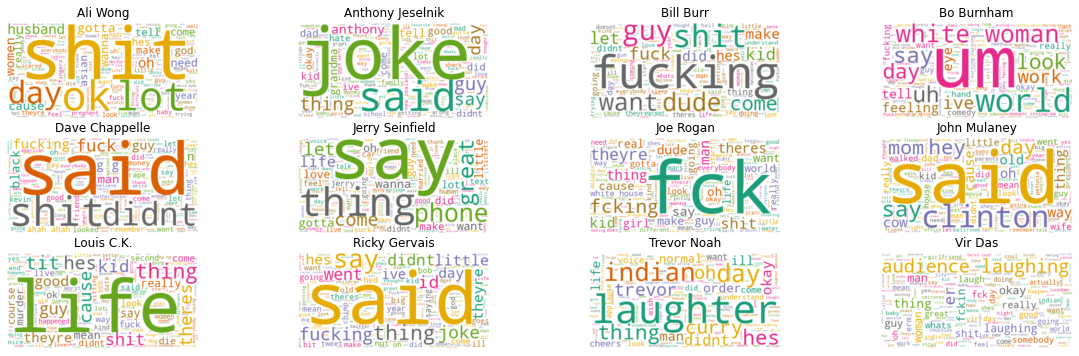

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Jerry Seinfield',
               'Joe Rogan', 'John Mulaney', 'Louis C.K.',  'Ricky Gervais', 'Trevor Noah' , 'Vir Das']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings



1.   Louis C.K. talks a lot about the idiosyncrasies of life and his relationship with his partner and breasts apparently.
2.   Ali Wong uses the s-word quite a few times and talks about women.
3.   Anthony Jeselnik jokes about joke.
4.   Bill Burr comedy revolves around using the f-word, f-ing and shit.
5.   Trevor uses the word laughter and Indian quite frequently.
6.   Dave Chappelle used the s-word quite a lot.



## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1037
8,Louis C.K.,1147
11,Vir Das,1292
3,Bo Burnham,1306
10,Trevor Noah,1376
0,Ali Wong,1386
4,Dave Chappelle,1429
7,John Mulaney,1450
5,Jerry Seinfield,1500
6,Joe Rogan,1516


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60,59,80,87,67,60,63, 61,58,79,60, 50]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
3,Bo Burnham,1306,3746,87,43.057471
1,Anthony Jeselnik,1037,2982,59,50.542373
0,Ali Wong,1386,3346,60,55.766667
8,Louis C.K.,1147,3395,58,58.534483
5,Jerry Seinfield,1500,3590,60,59.833333
4,Dave Chappelle,1429,4128,67,61.611940
9,Ricky Gervais,1682,5036,79,63.746835
7,John Mulaney,1450,4082,61,66.918033
2,Bill Burr,1707,5673,80,70.912500
6,Joe Rogan,1516,4725,63,75.000000


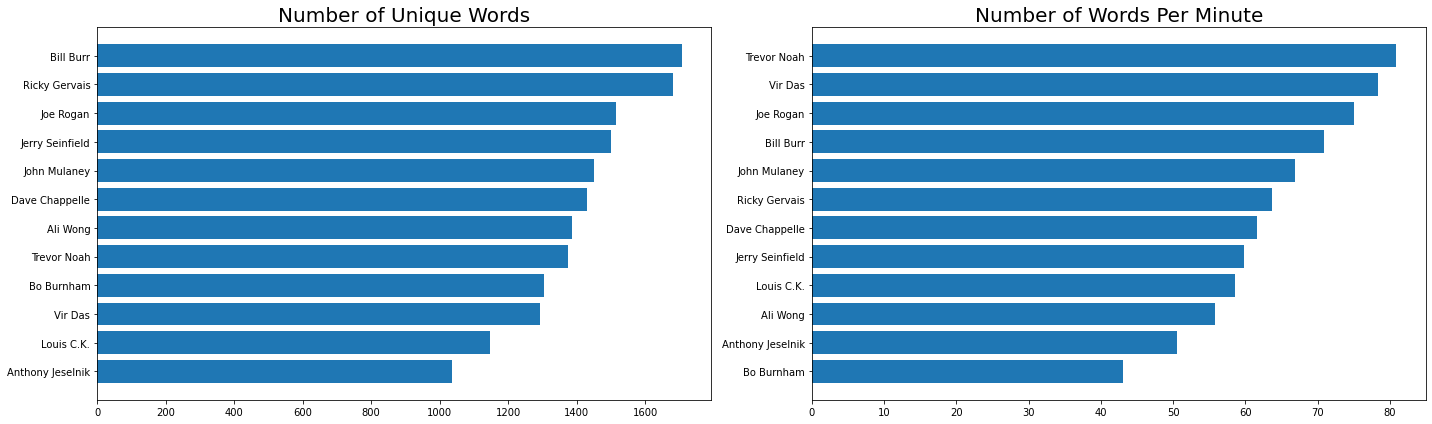

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Joe Rogan, Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Vir Das(Indian Context), Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Trevor Noah (Daily Show), Vir Das (Indian Context) and Joe Rogan talk fast.
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Dave Chappelle is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('gonna', 11),
 ('got', 11),
 ('people', 11),
 ('youre', 10),
 ('time', 9),
 ('yeah', 8),
 ('think', 8),
 ('shit', 7),
 ('oh', 7),
 ('thing', 7),
 ('day', 6),
 ('hes', 6),
 ('say', 6),
 ('theyre', 5),
 ('didnt', 5),
 ('really', 5),
 ('cause', 4),
 ('said', 4),
 ('did', 4),
 ('good', 4),
 ('fucking', 4),
 ('theres', 4),
 ('man', 4),
 ('lot', 3),
 ('gotta', 3),
 ('tell', 3),
 ('guys', 3),
 ('ive', 3),
 ('okay', 3),
 ('fuck', 3),
 ('come', 3),
 ('going', 3),
 ('life', 3),
 ('little', 3),
 ('ok', 2),
 ('wanna', 2),
 ('dude', 2),
 ('joke', 2),
 ('want', 2),
 ('guy', 2),
 ('make', 2),
 ('white', 2),
 ('ill', 2),
 ('great', 2),
 ('fck', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('went', 2),
 ('audience', 2),
 ('husband', 1),
 ('women', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('school', 1),
 ('baby', 1),
 ('let', 1),
 ('doing',

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
bo,32,26
dave,65,46
jerry,0,0
joe,0,40
john,4,6
louis,21,25
ricky,60,6


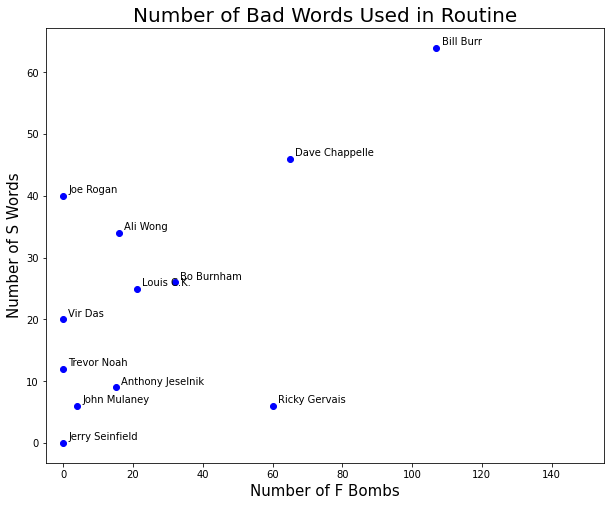

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Bill Burr's F and S-Bomb** - Burr averages more than 60 S-Bombs and 100 F-Bombs per 60 minutes.

* **Dave Chappelle's Close Second** - Dave Chappelle averages more than 45 S-words per 60 minutes and more than 60 F-words per 60 minutes.

* **Gervais romances with F-word** - Ricky Gervais averages alomst 60 F-Words every 60 minutes but averages less than 10 S-words per 60 minutes.

* **Clean Humor** - Even though I love profanity yet my favorite comedians in Trevor Noah, Jerry Seinfield and Vir Das average 0 F-words and sparingly use the S-Word.

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

I am comparing 'dick' as d-words and 'tits' and t-word.

In [ ]:
data_new_words = data.transpose()[['dick', 'tits']]
data_p = pd.concat([data_new_words.dick , data_new_words.tits], axis=1)
data_p.columns = ['d_word', 't_word']
data_p

,d_word,t_word
ali,1,0
anthony,0,0
bill,7,1
bo,6,1
dave,3,0
jerry,0,0
joe,12,0
john,7,0
louis,4,11
ricky,0,0


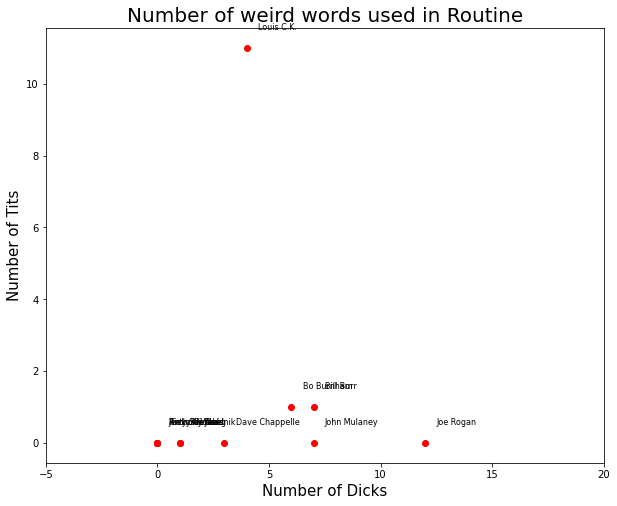

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_p.index):
    x = data_p.d_word.loc[comedian]
    y = data_p.t_word.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+0.5, y+0.5, full_names[i], fontsize=8)
    plt.xlim(-5, 20) 
    
plt.title('Number of weird words used in Routine', fontsize=20)
plt.xlabel('Number of Dicks', fontsize=15)
plt.ylabel('Number of Tits', fontsize=15)

plt.show()

Analysis: While Louis C.K. uses most T-Words wheras Joe Rogan uses the most D-Words

Comparing 'White' and 'People'

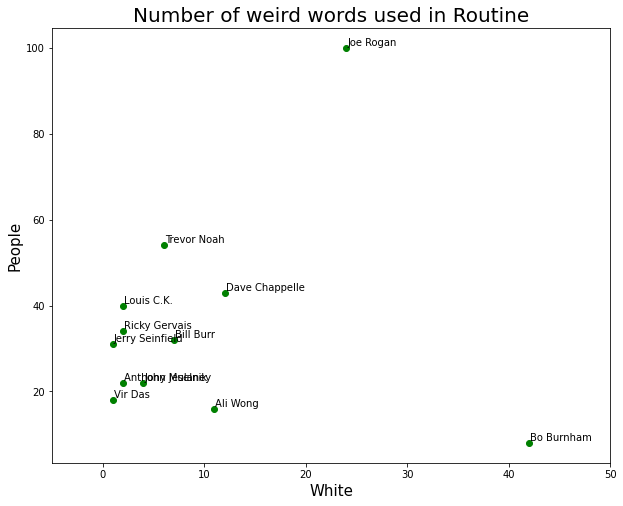

In [ ]:
data_new_words = data.transpose()[['white', 'people']]
data_p = pd.concat([data_new_words.white , data_new_words.people], axis=1)
data_p.columns = ['white', 'people']
data_p

for i, comedian in enumerate(data_p.index):
    x = data_p.white.loc[comedian]
    y = data_p.people.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+0.1, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 50) 
    
plt.title('Number of weird words used in Routine', fontsize=20)
plt.xlabel('White', fontsize=15)
plt.ylabel('People', fontsize=15)

plt.show()


Joe Rogan uses 'People' word the most while Bo Burnham uses 'White' the most.

# Sentiment Analysis


## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf...",Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",Jerry Seinfield
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ...",Joe Rogan
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais


In [ ]:
!pip install forge textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.3/784.3 KB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.3/166.3 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from textblob import TextBlob

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.068595,0.483829
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.015214,0.538279
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf...",Bo Burnham,0.037319,0.519463
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.004118,0.514873
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",Jerry Seinfield,0.097633,0.478883
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ...",Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...",John Mulaney,0.081169,0.484393
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056066,0.516826
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais,0.066029,0.498113


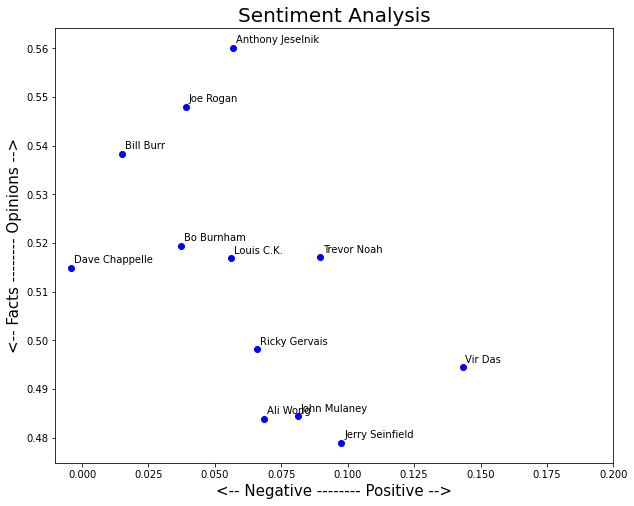

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .2) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

##Some observations

*   Anthony Jeselnick has a highly opinioned comedy routine followed by Joe Rogan and Bill Burr.
*   We observe that Vir Das, Jerry Seinfield, Trevor Noah and John Mulaney have a highly positive polarity in their comedy routine. 
*   Other than Dave Chappelle, all comedians have a postive polarity in their comedy routine. Dave Chappelle has an almost nuetral polarity, bordering on a very slighty negative polarity.
*    One thing that is highly noticable is that all these comedians have a barely positive polarity in their polarity. Vir Das stands out among all comedians as he has a positive polarity score of 0.15.
*    Another thing we observe for all comedians is that they have an opinionated comedy routine. Least opinionated are Jerry Seinfield, John and Ali Wong with a subjectivity of almost 0.48 or 0.49. 



## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 100 parts
import numpy as np
import math

def split_text(text, n=100):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Split each routine into 200 parts
import numpy as np
import math

def split_text(text, n=200):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Split each routine into 50 parts
import numpy as np
import math

def split_text(text, n=50):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got tha',
  't-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they jus

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

100

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.41107142857142864,
  -0.08862433862433862,
  0.3193877551020408,
  0.17714285714285713,
  0.1871428571428571,
  0.19092261904761904,
  -0.134375,
  0.20000000000000004,
  -0.39999999999999997,
  0.0,
  0.16875,
  -0.08333333333333334,
  0.17250000000000001,
  0.19095238095238096,
  0.0925,
  -0.17421874999999998,
  -0.09821428571428571,
  0.11145833333333334,
  0.05545634920634918,
  0.45,
  0.08271604938271605,
  -0.02685185185185185,
  0.055000000000000014,
  0.1875,
  0.16071428571428573,
  0.08571428571428572,
  0.08392857142857142,
  0.02732142857142857,
  0.265,
  -0.05482954545454545,
  0.3502604166666667,
  0.0825,
  0.09171428571428572,
  0.16666666666666666,
  -0.049711399711399734,
  -0.24687499999999998,
  0.38571428571428573,
  0.3,
  0.023809523809523836,
  0.0,
  0.15555555555555556,
  -0.125,
  0.09074074074074073,
  -0.15833333333333335,
  -0.06979166666666664,
  0.1166666666666667,
  -0.023469387755102045,
  -0.21999999999999997,
  -0.03333333333333334,
  -0.09999

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.6,
  0.26937500000000003,
  -0.2833333333333333,
  0.03392857142857142,
  0.32999999999999996,
  0.29285714285714287,
  0.39999999999999997,
  -0.15714285714285714,
  -0.75,
  0.4214285714285714,
  0.16666666666666666,
  0.19438775510204082,
  -0.13333333333333333,
  -0.1125,
  0.0,
  0.24000000000000005,
  -0.39999999999999997,
  0.0,
  0.0,
  0.0,
  0.08333333333333334,
  0.19722222222222222,
  -0.03333333333333334,
  -0.16666666666666666,
  0.3333333333333333,
  -0.1,
  0.27285714285714285,
  0.15,
  0.1,
  0.08750000000000001,
  0.13333333333333333,
  -0.35875,
  -0.0625,
  -0.125,
  0.1375,
  0.0984375,
  0.1619047619047619,
  -0.024379960317460342,
  0.675,
  0.17142857142857146,
  0.0,
  0.18611111111111112,
  -0.18833333333333332,
  0.175,
  0.13750000000000004,
  0.0,
  0.0,
  0.375,
  0.28125,
  0.0,
  0.19999999999999998,
  0.0,
  0.042857142857142844,
  0.125,
  0.014285714285714282,
  0.046875,
  0.0,
  0.265,
  0.02272727272727273,
  -0.2875,
  0.13368055555555558,
  

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.12999255952380953,
  0.26011904761904764,
  0.18946886446886443,
  0.00892857142857143,
  -0.24,
  0.042708333333333334,
  0.18256493506493507,
  -0.07163461538461538,
  0.034210526315789476,
  0.21984953703703702,
  0.027932098765432106,
  0.1138888888888889,
  0.12321428571428572,
  0.04349489795918367,
  0.06818181818181818,
  0.21638020833333332,
  0.11982142857142858,
  -0.10228835978835979,
  0.35000000000000003,
  0.013888888888888904,
  0.06833333333333333,
  0.0141025641025641,
  0.01011904761904763,
  -0.11417582417582418,
  -0.05384615384615384,
  0.010615079365079364,
  0.11363155480587121,
  0.2383116883116883,
  0.12522095959595958,
  0.17386363636363636,
  0.12612745098039216,
  -0.025,
  -0.024449035812672156,
  0.09164186507936507,
  0.035037878787878785,
  0.061111111111111116,
  0.18430059523809525,
  0.14583333333333334,
  0.12777777777777777,
  0.06666666666666667,
  0.04523809523809523,
  -0.026472663139329795,
  0.028566919191919227,
  0.05999999999999999,
  

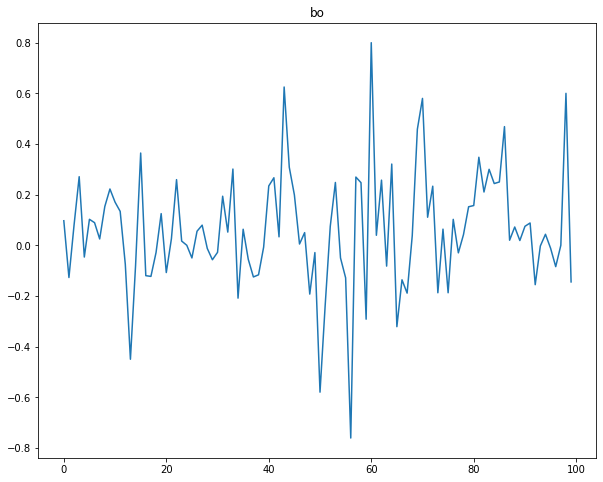

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[3])
plt.title(data['full_name'].index[3])
plt.show()

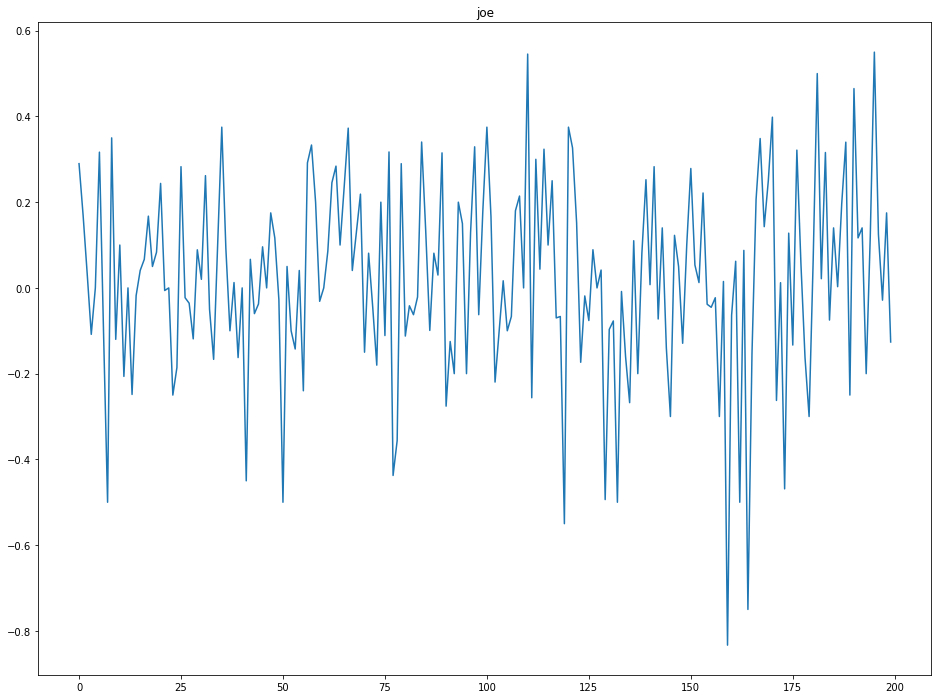

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[6])
plt.title(data['full_name'].index[6])
plt.show()

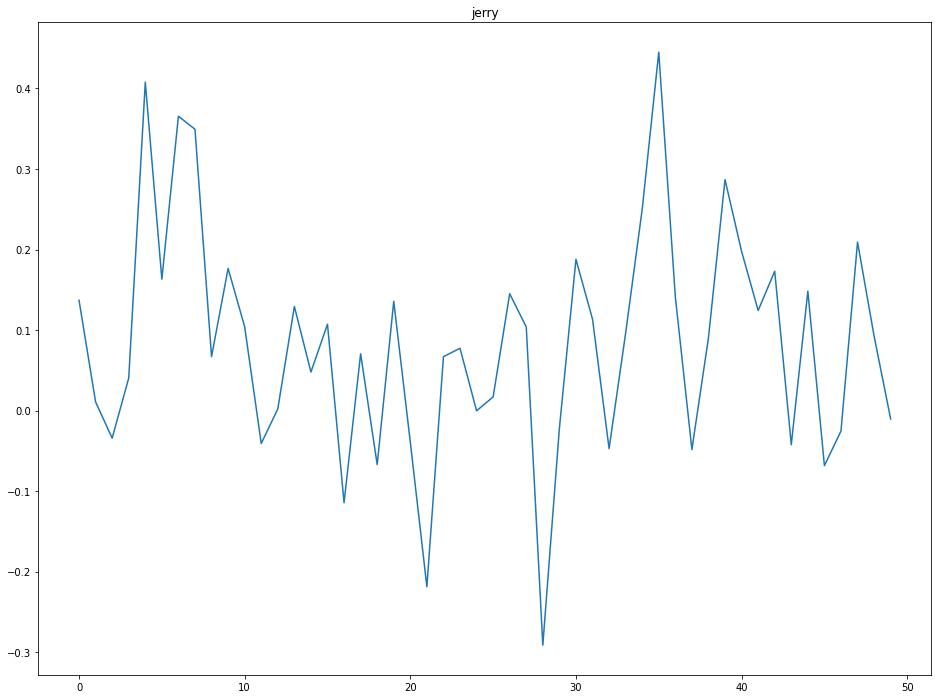

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[5])
plt.title(data['full_name'].index[5])
plt.show()

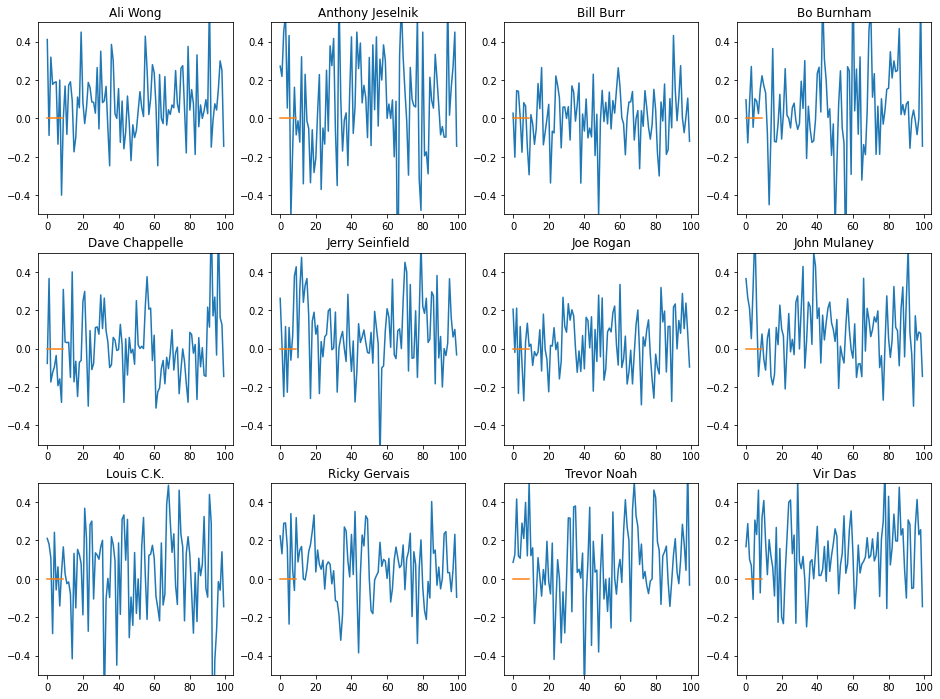

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.5, ymax=.5)
    
plt.show()

*   Anthony Jeselnick has a highly opinioned comedy routine followed by Joe Rogan and Bill Burr.
*   We observe that Vir Das, Jerry Seinfield, Trevor Noah and John Mulaney have a highly positive polarity in their comedy routine. 
*   Other than Dave Chappelle, all comedians have a postive polarity in their comedy routine. Dave Chappelle has an almost nuetral polarity, bordering on a very slighty negative polarity.
*    One thing that is highly noticable is that all these comedians have a barely positive polarity in their polarity. Vir Das stands out among all comedians as he has a positive polarity score of 0.15.
*    Another thing we observe for all comedians is that they have an opinionated comedy routine. Least opinionated are Jerry Seinfield, John and Ali Wong with a subjectivity of almost 0.48 or 0.49. 

I changed the numbers to 100, 50 and 200 to see how its affected. Please refer above for plots. 

I observed that by increasing the sections, one could understand the niches and nuances to their comedies in terms of polarity and subjectivity.

I also observed that most comedians start off on a very high note in terms of polarity, but end their show on negative notes. Mostly their comedies balanced but they are highly mercurial. Maybe most effective comedies is being able to contrast 

# Topic Modeling

## Introduction


Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaah,aah,abandon,abc,abcs,abilities,ability,abject,able,...,zero,zillion,zombie,zombies,zoning,zoo,zoom,zoomers,zuckerberg,éclair
ali,0,0,0,0,1,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jerry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,3,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,0,0,1,1,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Import the necessary modules for LDA with gensim
!pip install forge gensim
from gensim import matutils, models
import scipy.sparse

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,jerry,joe,john,louis,ricky,trevor,vir
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,3,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,1,0
abc,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.008*"shit" + 0.006*"thing" + 0.006*"laughing" + 0.005*"theyre" + 0.005*"man" + 0.005*"audience" + 0.005*"life" + 0.005*"theres" + 0.005*"say" + 0.004*"cause"'),
 (1,
  '0.007*"laughter" + 0.006*"said" + 0.005*"say" + 0.005*"oh" + 0.005*"day" + 0.005*"didnt" + 0.005*"shit" + 0.005*"hes" + 0.004*"little" + 0.004*"thing"')]

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.008*"said" + 0.008*"shit" + 0.006*"man" + 0.005*"fcking" + 0.005*"fck" + 0.005*"didnt" + 0.005*"theyre" + 0.005*"say" + 0.005*"good" + 0.004*"oh"'),
 (1,
  '0.015*"laughter" + 0.010*"laughing" + 0.009*"audience" + 0.006*"day" + 0.006*"okay" + 0.005*"thing" + 0.005*"oh" + 0.005*"indian" + 0.005*"world" + 0.004*"shit"'),
 (2,
  '0.006*"shit" + 0.006*"say" + 0.006*"said" + 0.006*"fucking" + 0.005*"hes" + 0.005*"thing" + 0.005*"little" + 0.005*"life" + 0.005*"didnt" + 0.004*"theyre"')]

In [ ]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=27)
lda.print_topics()

[(0,
  '0.011*"laughter" + 0.008*"shit" + 0.006*"day" + 0.006*"hes" + 0.005*"oh" + 0.005*"cause" + 0.005*"theyre" + 0.005*"thing" + 0.005*"life" + 0.005*"theres"'),
 (1,
  '0.000*"shit" + 0.000*"oh" + 0.000*"hes" + 0.000*"say" + 0.000*"said" + 0.000*"little" + 0.000*"day" + 0.000*"thing" + 0.000*"theyre" + 0.000*"okay"'),
 (2,
  '0.000*"day" + 0.000*"shit" + 0.000*"said" + 0.000*"say" + 0.000*"thing" + 0.000*"laughter" + 0.000*"didnt" + 0.000*"theres" + 0.000*"hes" + 0.000*"man"'),
 (3,
  '0.009*"said" + 0.008*"say" + 0.006*"little" + 0.005*"day" + 0.005*"didnt" + 0.005*"thing" + 0.005*"went" + 0.005*"joke" + 0.004*"did" + 0.004*"oh"'),
 (4,
  '0.010*"shit" + 0.009*"laughing" + 0.008*"fucking" + 0.007*"audience" + 0.007*"said" + 0.007*"man" + 0.006*"didnt" + 0.005*"fuck" + 0.005*"did" + 0.005*"want"')]

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=15)
lda.print_topics()

[(0,
  '0.009*"laughing" + 0.008*"said" + 0.007*"audience" + 0.006*"say" + 0.005*"thing" + 0.005*"went" + 0.005*"little" + 0.005*"day" + 0.004*"er" + 0.004*"oh"'),
 (1,
  '0.009*"shit" + 0.007*"fucking" + 0.006*"said" + 0.006*"say" + 0.005*"didnt" + 0.005*"man" + 0.005*"fuck" + 0.005*"theyre" + 0.004*"did" + 0.004*"white"'),
 (2,
  '0.005*"wanna" + 0.005*"gotta" + 0.005*"lot" + 0.005*"oh" + 0.005*"say" + 0.004*"shit" + 0.004*"life" + 0.004*"little" + 0.004*"want" + 0.004*"ok"'),
 (3,
  '0.022*"laughter" + 0.008*"hes" + 0.007*"life" + 0.007*"thing" + 0.006*"day" + 0.006*"indian" + 0.005*"didnt" + 0.005*"theres" + 0.005*"cause" + 0.004*"shit"')]

In [ ]:
# LDA for num_topics = 10

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=50)
lda.print_topics()

[(0,
  '0.000*"laughter" + 0.000*"day" + 0.000*"say" + 0.000*"shit" + 0.000*"oh" + 0.000*"come" + 0.000*"didnt" + 0.000*"little" + 0.000*"indian" + 0.000*"thing"'),
 (1,
  '0.000*"said" + 0.000*"shit" + 0.000*"thing" + 0.000*"oh" + 0.000*"didnt" + 0.000*"day" + 0.000*"man" + 0.000*"fucking" + 0.000*"hes" + 0.000*"say"'),
 (2,
  '0.009*"shit" + 0.008*"said" + 0.005*"say" + 0.005*"day" + 0.005*"fuck" + 0.005*"lot" + 0.005*"white" + 0.005*"didnt" + 0.005*"really" + 0.005*"um"'),
 (3,
  '0.000*"said" + 0.000*"cause" + 0.000*"hes" + 0.000*"didnt" + 0.000*"old" + 0.000*"man" + 0.000*"say" + 0.000*"little" + 0.000*"way" + 0.000*"oh"'),
 (4,
  '0.027*"laughing" + 0.022*"audience" + 0.014*"er" + 0.008*"man" + 0.007*"okay" + 0.007*"thing" + 0.007*"fckin" + 0.006*"woman" + 0.005*"shit" + 0.005*"really"'),
 (5,
  '0.008*"life" + 0.008*"shit" + 0.007*"fucking" + 0.007*"thing" + 0.006*"hes" + 0.006*"say" + 0.006*"want" + 0.006*"theres" + 0.005*"didnt" + 0.005*"guy"'),
 (6,
  '0.010*"said" + 0.009*"f

In [ ]:
# LDA for num_topics = 7

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=7, passes=20)
lda.print_topics()

[(0,
  '0.008*"shit" + 0.007*"theyre" + 0.007*"fucking" + 0.007*"say" + 0.006*"said" + 0.006*"thing" + 0.006*"theres" + 0.005*"hes" + 0.005*"didnt" + 0.005*"life"'),
 (1,
  '0.013*"laughter" + 0.009*"laughing" + 0.008*"audience" + 0.006*"day" + 0.006*"thing" + 0.006*"oh" + 0.005*"okay" + 0.005*"man" + 0.005*"say" + 0.005*"said"'),
 (2,
  '0.000*"shit" + 0.000*"thing" + 0.000*"say" + 0.000*"day" + 0.000*"little" + 0.000*"man" + 0.000*"hes" + 0.000*"theyre" + 0.000*"cause" + 0.000*"come"'),
 (3,
  '0.000*"said" + 0.000*"say" + 0.000*"oh" + 0.000*"shit" + 0.000*"didnt" + 0.000*"man" + 0.000*"life" + 0.000*"did" + 0.000*"theyre" + 0.000*"going"'),
 (4,
  '0.000*"shit" + 0.000*"hes" + 0.000*"thing" + 0.000*"say" + 0.000*"day" + 0.000*"didnt" + 0.000*"life" + 0.000*"said" + 0.000*"good" + 0.000*"oh"'),
 (5,
  '0.008*"shit" + 0.008*"um" + 0.007*"white" + 0.006*"oh" + 0.006*"day" + 0.005*"world" + 0.005*"uh" + 0.005*"wanna" + 0.005*"feeling" + 0.005*"tell"'),
 (6,
  '0.014*"said" + 0.010*"shit

It is my own observation that topics generated are redundant and centre around cuss words. I have tried to change the number of topics and the number of passes. I'll modify our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,cheers and applause all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to b...
bo,exploring mental health decline over the constant challenges our world faces and the struggles of life itself bo burnham creates a wonderful mast...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jerry,jerry seinfelds new hourlong comedy special jerry seinfeld hours to kill is now available on netflix in the first scene of the special we see sei...
joe,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fck is going on sa...
john,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met b...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

nltk.download()



NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na shit cause i ten minutes thank day year year people uh i im i girl thought im foremost metabolism gir...
anthony,thank thank people i em i francisco city world im stage place cities place bit today baby baby back car day dont monster i baby rock window window...
bill,cheers thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade man hell life shape man hate gym id week bru...
bo,health decline world struggles life burnham masterpiece view experience youd year id home ah ah i year sorry mess ah ah i haircut roberts today go...
dave,jokes living stare work profound train thought alchemists transforms levity livelihood trance play tune ahah ghetto ahah ahah ahah ghetto ahah aha...
jerry,jerry comedy jerry hours netflix scene yorks theater persona helicopter hudson river helicopter pilot seinfeld show dont ya jerry pilot theyre tra...
joe,rock music audience announcer ladies gentlemen joe audience cheering fck thanks phone fckface i phone motherfckers eyes goddamn phone whoo whoo st...
john,charm wit snl writer john mulaney marriage beef babies time bill clinton petunia thats hello hello chicago thank crowd energy show okay thank crow...
louis,music lets lights lights thank i i place place miles direction building shit town sentence i difference sidewalk street pedestrians people kind wa...
ricky,hello thank fuck thank im gon youre weve moneys legend shut im guy round people sort jesus way show humanity dont i fan i dogs dogs people people ...


In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,abc,abcs,abilities,ability,abortion,abortions,abuse,accent,accents,...,ze,zealand,zebra,zillion,zombie,zombies,zoo,zoom,zoomers,éclair
ali,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,2,0,0,1,0,...,0,10,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
dave,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jerry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
louis,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"shit" + 0.011*"man" + 0.009*"thing" + 0.008*"life" + 0.008*"audience" + 0.007*"gon" + 0.007*"hes" + 0.007*"lot" + 0.007*"guy" + 0.007*"cause"'),
 (1,
  '0.012*"day" + 0.010*"laughter" + 0.010*"thing" + 0.007*"hes" + 0.006*"world" + 0.006*"life" + 0.006*"joke" + 0.006*"way" + 0.006*"things" + 0.006*"man"')]

In [ ]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.024*"laughter" + 0.011*"man" + 0.010*"hes" + 0.010*"day" + 0.009*"shit" + 0.007*"thing" + 0.007*"ahah" + 0.006*"audience" + 0.006*"lot" + 0.006*"didnt"'),
 (1,
  '0.011*"day" + 0.008*"thing" + 0.007*"world" + 0.007*"man" + 0.007*"way" + 0.007*"shit" + 0.006*"joke" + 0.006*"lot" + 0.006*"cause" + 0.006*"gon"'),
 (2,
  '0.013*"thing" + 0.012*"life" + 0.011*"audience" + 0.009*"man" + 0.009*"shit" + 0.007*"gon" + 0.007*"guy" + 0.007*"hes" + 0.007*"day" + 0.006*"woman"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.014*"joke" + 0.011*"day" + 0.010*"thing" + 0.007*"things" + 0.007*"years" + 0.006*"jokes" + 0.006*"id" + 0.005*"hes" + 0.005*"way" + 0.004*"money"'),
 (1,
  '0.012*"life" + 0.012*"shit" + 0.010*"thing" + 0.009*"man" + 0.008*"gon" + 0.008*"cause" + 0.008*"hes" + 0.008*"lot" + 0.008*"guy" + 0.007*"day"'),
 (2,
  '0.014*"audience" + 0.012*"man" + 0.008*"shit" + 0.008*"thing" + 0.007*"way" + 0.007*"woman" + 0.006*"day" + 0.006*"night" + 0.006*"lot" + 0.005*"ahah"'),
 (3,
  '0.028*"laughter" + 0.016*"day" + 0.011*"world" + 0.009*"thing" + 0.009*"hes" + 0.007*"audience" + 0.006*"voice" + 0.006*"man" + 0.006*"gon" + 0.006*"life"')]

In [ ]:
# Let's try 5 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=5, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.014*"shit" + 0.009*"dude" + 0.009*"guy" + 0.009*"gon" + 0.009*"thing" + 0.008*"hes" + 0.007*"man" + 0.007*"fuck" + 0.007*"life" + 0.006*"kid"'),
 (1,
  '0.010*"day" + 0.010*"thing" + 0.008*"things" + 0.008*"life" + 0.008*"man" + 0.007*"way" + 0.007*"joke" + 0.007*"house" + 0.006*"kids" + 0.006*"years"'),
 (2,
  '0.022*"laughter" + 0.020*"audience" + 0.015*"thing" + 0.012*"day" + 0.012*"life" + 0.011*"hes" + 0.011*"man" + 0.007*"gon" + 0.007*"food" + 0.007*"cause"'),
 (3,
  '0.015*"world" + 0.010*"day" + 0.009*"eyes" + 0.007*"woman" + 0.007*"comedy" + 0.007*"womans" + 0.006*"gon" + 0.006*"mom" + 0.005*"thing" + 0.005*"everybody"'),
 (4,
  '0.016*"shit" + 0.011*"lot" + 0.010*"man" + 0.008*"ahah" + 0.008*"women" + 0.008*"fuck" + 0.006*"hes" + 0.005*"didnt" + 0.005*"money" + 0.005*"husband"')]

In [ ]:
# Let's try 6 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"clinton" + 0.009*"mom" + 0.008*"day" + 0.008*"way" + 0.008*"hey" + 0.008*"cow" + 0.007*"wife" + 0.007*"dad" + 0.006*"house" + 0.006*"cause"'),
 (1,
  '0.001*"shit" + 0.001*"thing" + 0.001*"life" + 0.001*"man" + 0.001*"hes" + 0.001*"day" + 0.000*"way" + 0.000*"woman" + 0.000*"things" + 0.000*"guy"'),
 (2,
  '0.015*"day" + 0.013*"world" + 0.012*"joke" + 0.008*"thing" + 0.007*"mom" + 0.007*"comedy" + 0.006*"eyes" + 0.006*"way" + 0.006*"lot" + 0.005*"anthony"'),
 (3,
  '0.012*"shit" + 0.011*"thing" + 0.011*"life" + 0.010*"hes" + 0.009*"man" + 0.009*"gon" + 0.009*"day" + 0.008*"cause" + 0.007*"theyre" + 0.007*"kids"'),
 (4,
  '0.030*"laughter" + 0.027*"audience" + 0.015*"day" + 0.013*"thing" + 0.013*"man" + 0.010*"hes" + 0.007*"life" + 0.006*"food" + 0.006*"voice" + 0.006*"woman"'),
 (5,
  '0.011*"man" + 0.010*"shit" + 0.009*"lot" + 0.008*"ahah" + 0.008*"life" + 0.007*"things" + 0.006*"thing" + 0.006*"fuck" + 0.006*"phone" + 0.006*"didnt"')]

In [ ]:
# Let's try 7 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=7, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.050*"laughter" + 0.018*"day" + 0.014*"hes" + 0.012*"thing" + 0.011*"audience" + 0.010*"voice" + 0.010*"curry" + 0.009*"man" + 0.008*"life" + 0.008*"applause"'),
 (1,
  '0.001*"day" + 0.001*"laughter" + 0.001*"shit" + 0.001*"thing" + 0.001*"man" + 0.001*"hes" + 0.000*"gon" + 0.000*"life" + 0.000*"lot" + 0.000*"cause"'),
 (2,
  '0.013*"shit" + 0.012*"man" + 0.010*"life" + 0.010*"thing" + 0.009*"hes" + 0.009*"guy" + 0.008*"way" + 0.008*"cause" + 0.008*"gon" + 0.008*"kids"'),
 (3,
  '0.013*"shit" + 0.012*"lot" + 0.010*"husband" + 0.009*"day" + 0.009*"women" + 0.007*"cause" + 0.006*"dude" + 0.006*"gon" + 0.006*"god" + 0.005*"theyre"'),
 (4,
  '0.011*"day" + 0.010*"thing" + 0.010*"joke" + 0.009*"life" + 0.009*"things" + 0.009*"lot" + 0.009*"phone" + 0.006*"way" + 0.005*"world" + 0.005*"school"'),
 (5,
  '0.011*"joke" + 0.010*"thing" + 0.009*"years" + 0.009*"day" + 0.008*"hes" + 0.008*"id" + 0.007*"things" + 0.006*"nuts" + 0.006*"jenner" + 0.005*"woman"'),
 (6,
  '0.023*"audience" +

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi welcome thank hello hello na shit cause i like ten minutes thank much um exciting day exciting year yea...
anthony,thank san francisco thank good people surprised i em i special san francisco correct city world im stage place favorite cities good place little b...
bill,cheers right thank thank pleasure greater atlanta georgia area oasis nice i i june nice wasnt miserable horrible kind heat racism i anybody look e...
bo,mental health decline constant world struggles life bo burnham wonderful masterpiece general view personal experience youd year id home ah ah i ye...
dave,dirty jokes living stare most hard work profound train thought alchemists transforms levity livelihood trance play workinonit tune ahah ahah ghett...
jerry,jerry new hourlong comedy special jerry hours available netflix first scene special seinfield new yorks theater secretagent persona helicopter hud...
joe,rock music audience announcer ladies gentlemen joe rogan audience cheering fck san francisco thanks i phone fckface i phone motherfckers eyes ta g...
john,boyish charm sharp wit former snl writer john mulaney marriage beef babies time bill clinton right petunia august thats good right hello hello chi...
louis,music lets lights lights thank much i i i nice place nicest place many miles direction building shit town sentence odd i difference sidewalk stree...
ricky,hello great thank fuck thank lovely welcome im gon hardest tonight youre relax weve moneys worth legend shut god im ordinary guy round people sort...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aah,abc,abcs,abilities,ability,abject,able,abortion,abortions,...,ze,zealand,zebra,zillion,zombie,zombies,zoo,zoom,zoomers,éclair
ali,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,2,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,1,0,0,0,1,0,0,...,1,0,0,1,1,1,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
dave,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
jerry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"joke" + 0.008*"fuck" + 0.006*"fucking" + 0.004*"dude" + 0.004*"ahah" + 0.003*"jokes" + 0.003*"mad" + 0.003*"anthony" + 0.003*"water" + 0.003*"hell"'),
 (1,
  '0.011*"laughter" + 0.009*"audience" + 0.005*"fck" + 0.004*"indian" + 0.004*"um" + 0.004*"uh" + 0.003*"food" + 0.003*"phone" + 0.003*"dude" + 0.003*"er"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.020*"laughter" + 0.015*"audience" + 0.008*"indian" + 0.005*"joke" + 0.005*"er" + 0.005*"ahah" + 0.004*"fuck" + 0.004*"curry" + 0.004*"accent" + 0.004*"normal"'),
 (1,
  '0.006*"ok" + 0.005*"clinton" + 0.004*"course" + 0.004*"tit" + 0.004*"husband" + 0.004*"cow" + 0.003*"wife" + 0.003*"president" + 0.003*"ha" + 0.003*"dude"'),
 (2,
  '0.005*"dude" + 0.005*"fck" + 0.005*"um" + 0.005*"fuck" + 0.005*"fucking" + 0.004*"joke" + 0.004*"phone" + 0.003*"hell" + 0.003*"water" + 0.003*"uh"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.011*"audience" + 0.007*"fck" + 0.004*"er" + 0.004*"course" + 0.004*"joke" + 0.004*"food" + 0.003*"clinton" + 0.003*"fcking" + 0.003*"laughing" + 0.003*"president"'),
 (1,
  '0.009*"joke" + 0.007*"anthony" + 0.006*"husband" + 0.005*"grandma" + 0.005*"ok" + 0.004*"mad" + 0.004*"jokes" + 0.004*"pregnant" + 0.004*"shark" + 0.004*"fuck"'),
 (2,
  '0.009*"fuck" + 0.007*"um" + 0.006*"fucking" + 0.006*"dude" + 0.005*"ahah" + 0.004*"phone" + 0.004*"uh" + 0.003*"wife" + 0.003*"gay" + 0.003*"hell"'),
 (3,
  '0.047*"laughter" + 0.017*"indian" + 0.010*"curry" + 0.009*"audience" + 0.008*"normal" + 0.008*"accent" + 0.007*"trevor" + 0.007*"applause" + 0.007*"order" + 0.006*"cheers"')]

In [ ]:
# Let's try 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.052*"laughter" + 0.018*"indian" + 0.011*"curry" + 0.010*"audience" + 0.009*"normal" + 0.008*"accent" + 0.008*"trevor" + 0.007*"applause" + 0.007*"order" + 0.007*"cheers"'),
 (1,
  '0.007*"joke" + 0.007*"phone" + 0.006*"course" + 0.005*"anthony" + 0.005*"tit" + 0.004*"dog" + 0.004*"food" + 0.004*"grandma" + 0.003*"shark" + 0.003*"jokes"'),
 (2,
  '0.011*"um" + 0.009*"joke" + 0.005*"uh" + 0.004*"fucking" + 0.004*"nuts" + 0.004*"jenner" + 0.004*"womans" + 0.004*"chimp" + 0.004*"hampstead" + 0.003*"fuck"'),
 (3,
  '0.013*"audience" + 0.009*"fck" + 0.009*"dude" + 0.005*"er" + 0.005*"fuck" + 0.004*"fucking" + 0.004*"fcking" + 0.004*"laughing" + 0.003*"somebody" + 0.003*"dick"'),
 (4,
  '0.008*"ahah" + 0.007*"clinton" + 0.007*"wife" + 0.006*"fuck" + 0.005*"friend" + 0.005*"gay" + 0.005*"cow" + 0.003*"fucking" + 0.003*"president" + 0.003*"son"')]

In [ ]:
# Let's try 6 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"fuck" + 0.006*"ahah" + 0.005*"ok" + 0.004*"phone" + 0.004*"dude" + 0.004*"husband" + 0.004*"course" + 0.004*"gay" + 0.003*"men" + 0.003*"dog"'),
 (1,
  '0.015*"um" + 0.012*"joke" + 0.008*"anthony" + 0.007*"uh" + 0.005*"jokes" + 0.005*"grandma" + 0.005*"fuck" + 0.005*"womans" + 0.005*"fuckin" + 0.005*"tonight"'),
 (2,
  '0.017*"laughter" + 0.014*"audience" + 0.007*"fck" + 0.007*"indian" + 0.004*"er" + 0.004*"joke" + 0.004*"food" + 0.004*"clinton" + 0.003*"curry" + 0.003*"accent"'),
 (3,
  '0.000*"audience" + 0.000*"joke" + 0.000*"fuck" + 0.000*"dude" + 0.000*"fucking" + 0.000*"uh" + 0.000*"phone" + 0.000*"somebody" + 0.000*"fck" + 0.000*"um"'),
 (4,
  '0.011*"fuck" + 0.011*"dude" + 0.010*"fucking" + 0.006*"gun" + 0.005*"jesus" + 0.004*"hell" + 0.004*"sense" + 0.004*"trouble" + 0.004*"religion" + 0.004*"helicopter"'),
 (5,
  '0.000*"laughter" + 0.000*"audience" + 0.000*"fuck" + 0.000*"indian" + 0.000*"dude" + 0.000*"food" + 0.000*"phone" + 0.000*"joke" + 0.000*"normal" + 0

In [ ]:
# Let's try 7 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=7, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.013*"fck" + 0.009*"ahah" + 0.007*"dude" + 0.007*"fcking" + 0.007*"fuck" + 0.006*"men" + 0.005*"water" + 0.005*"gay" + 0.004*"dick" + 0.004*"young"'),
 (1,
  '0.014*"um" + 0.008*"phone" + 0.007*"uh" + 0.005*"womans" + 0.005*"special" + 0.004*"hand" + 0.004*"wan" + 0.004*"instagram" + 0.004*"jeffrey" + 0.004*"feeling"'),
 (2,
  '0.042*"laughter" + 0.015*"indian" + 0.011*"joke" + 0.009*"curry" + 0.008*"audience" + 0.008*"normal" + 0.007*"accent" + 0.007*"anthony" + 0.007*"trevor" + 0.006*"applause"'),
 (3,
  '0.013*"clinton" + 0.009*"cow" + 0.008*"wife" + 0.006*"president" + 0.006*"john" + 0.005*"movie" + 0.005*"friend" + 0.005*"finch" + 0.005*"ballroom" + 0.005*"petunia"'),
 (4,
  '0.000*"dude" + 0.000*"audience" + 0.000*"laughter" + 0.000*"fuck" + 0.000*"fucking" + 0.000*"uh" + 0.000*"fck" + 0.000*"joke" + 0.000*"men" + 0.000*"water"'),
 (5,
  '0.021*"audience" + 0.009*"er" + 0.008*"dude" + 0.007*"fuck" + 0.006*"fucking" + 0.006*"laughing" + 0.005*"somebody" + 0.005*"fckin" + 

## Identify Topics in Each Document

Out of the 17 topic models we looked at, the nouns and adjectives, 5 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.007*"joke" + 0.007*"phone" + 0.006*"clinton" + 0.005*"wife" + 0.005*"anthony" + 0.004*"cow" + 0.004*"movie" + 0.004*"grandma" + 0.004*"hell" + 0.003*"friend"'),
 (1,
  '0.019*"fck" + 0.010*"fcking" + 0.007*"dude" + 0.005*"dick" + 0.005*"water" + 0.004*"men" + 0.004*"texas" + 0.004*"audience" + 0.003*"em" + 0.003*"dolphins"'),
 (2,
  '0.008*"ahah" + 0.007*"fuck" + 0.007*"joke" + 0.006*"fucking" + 0.004*"gay" + 0.004*"nuts" + 0.004*"water" + 0.004*"jenner" + 0.004*"rape" + 0.003*"chimp"'),
 (3,
  '0.008*"um" + 0.008*"fuck" + 0.008*"dude" + 0.005*"fucking" + 0.005*"uh" + 0.005*"ok" + 0.004*"fuckin" + 0.003*"tit" + 0.003*"husband" + 0.003*"gun"'),
 (4,
  '0.035*"laughter" + 0.026*"audience" + 0.014*"indian" + 0.009*"er" + 0.007*"curry" + 0.006*"normal" + 0.006*"food" + 0.006*"accent" + 0.006*"laughing" + 0.006*"applause"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: sexuality and sexual preferences
* Topic 1: husband, wife
* Topic 2: guns
* Topic 3: profanity
* Topic 4: Indians and Audience

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'ali'),
 (0, 'anthony'),
 (3, 'bill'),
 (3, 'bo'),
 (2, 'dave'),
 (0, 'jerry'),
 (1, 'joe'),
 (0, 'john'),
 (3, 'louis'),
 (2, 'ricky'),
 (4, 'trevor'),
 (4, 'vir')]

After a first pass of LDA, these are my observations:

* Topic 0: sexuality and sexual preferences [Ali, Ricky, Jerry]
* Topic 1: husband, wife [Ali,Anthony, John]
* Topic 2: guns [Trevor, Jim]
* Topic 3: profanity [Bo, Bill, Louis, Joe]
* Topic 4: Indians and Audience [Hasan,Vir,Trevor]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.

-- I have modelled.


2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

#Only Adjectives

In [ ]:
def adjectives(text):
    '''Given a string of text, tokenize the text and pull out only the adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adjectives = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adjectives)


In [ ]:
data_adj = pd.DataFrame(data_clean.transcript.apply(adjectives))
data_adj


In [ ]:
cvadj = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvadj = cvadj.fit_transform(data_adj.transcript)
data_dtmadj = pd.DataFrame(data_cvadj.toarray(), columns=cvadj.get_feature_names())
data_dtmadj.index = data_adj.index
data_dtmadj


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,abject,able,absolute,abstract,accent,acceptable,accomplished,accountable,accurate,...,york,youd,youll,young,younger,youngest,youtube,youve,yuvan,yyou
ali,0,0,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bo,0,0,0,0,1,0,1,0,4,0,...,0,1,1,1,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,1,0,0
jerry,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
joe,0,0,2,0,0,0,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
john,0,0,3,0,0,0,1,1,0,0,...,0,0,1,2,1,0,0,1,0,0
louis,0,0,1,0,0,0,0,0,0,1,...,0,1,0,8,3,0,0,0,0,0
ricky,0,1,2,0,0,0,0,0,0,1,...,0,0,1,2,0,1,0,4,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmadj.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's try 7 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=7, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.022*"efficient" + 0.008*"champs" + 0.007*"edits" + 0.007*"clit" + 0.007*"brilliant" + 0.006*"briefcase" + 0.006*"disgust" + 0.006*"doormen" + 0.005*"bridge" + 0.005*"blinders"'),
 (1,
  '0.011*"cook" + 0.008*"farmer" + 0.007*"convince" + 0.006*"chris" + 0.004*"adorable" + 0.004*"drive" + 0.004*"dumbest" + 0.003*"dsouza" + 0.003*"albany" + 0.003*"bowling"'),
 (2,
  '0.011*"crown" + 0.009*"convince" + 0.009*"agitprop" + 0.007*"compelling" + 0.004*"edits" + 0.004*"cases" + 0.004*"cook" + 0.004*"events" + 0.004*"efficient" + 0.004*"butter"'),
 (3,
  '0.039*"cereal" + 0.020*"choices" + 0.019*"consistent" + 0.010*"btch" + 0.006*"coo" + 0.006*"definition" + 0.005*"boots" + 0.005*"adult" + 0.005*"country" + 0.005*"barbie"'),
 (4,
  '0.010*"blog" + 0.008*"bored" + 0.005*"cereal" + 0.005*"cats" + 0.005*"brilliant" + 0.005*"clapton" + 0.005*"dawg" + 0.004*"bughtown" + 0.004*"example" + 0.004*"bag"'),
 (5,
  '0.000*"farmer" + 0.000*"blinders" + 0.000*"convince" + 0.000*"cook" + 0.000*"co

In [ ]:
# Let's try 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"brilliant" + 0.007*"doormen" + 0.006*"bridge" + 0.005*"briefcase" + 0.003*"cats" + 0.002*"cook" + 0.002*"dsouza" + 0.002*"clit" + 0.002*"blinders" + 0.002*"daycare"'),
 (1,
  '0.007*"cats" + 0.006*"boredom" + 0.006*"doughnuts" + 0.006*"adult" + 0.006*"farmer" + 0.005*"blog" + 0.005*"canadas" + 0.005*"brilliant" + 0.005*"classic" + 0.005*"bored"'),
 (2,
  '0.021*"efficient" + 0.009*"edits" + 0.007*"champs" + 0.006*"crown" + 0.005*"compelling" + 0.005*"clit" + 0.005*"decade" + 0.005*"disgust" + 0.005*"doughnuts" + 0.005*"agitprop"'),
 (3,
  '0.000*"cereal" + 0.000*"choices" + 0.000*"consistent" + 0.000*"edits" + 0.000*"efficient" + 0.000*"compelling" + 0.000*"doughnuts" + 0.000*"coo" + 0.000*"btch" + 0.000*"boots"'),
 (4,
  '0.023*"cereal" + 0.012*"choices" + 0.012*"consistent" + 0.006*"btch" + 0.005*"cook" + 0.005*"farmer" + 0.005*"blinders" + 0.005*"chris" + 0.004*"boots" + 0.004*"cor"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.016*"efficient" + 0.006*"edits" + 0.006*"champs" + 0.005*"disgust" + 0.003*"blinders" + 0.003*"events" + 0.002*"classic" + 0.002*"chris" + 0.002*"ashram" + 0.002*"diff"'),
 (1,
  '0.011*"cereal" + 0.006*"consistent" + 0.005*"farmer" + 0.005*"choices" + 0.005*"brilliant" + 0.005*"cook" + 0.005*"adult" + 0.005*"clit" + 0.004*"doughnuts" + 0.004*"boots"'),
 (2,
  '0.003*"cats" + 0.003*"compelling" + 0.003*"coaches" + 0.002*"doughnuts" + 0.002*"edits" + 0.002*"disgust" + 0.002*"bossy" + 0.002*"drizzling" + 0.002*"canadas" + 0.002*"boots"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.016*"cereal" + 0.012*"efficient" + 0.008*"consistent" + 0.007*"choices" + 0.007*"edits" + 0.006*"boots" + 0.005*"cats" + 0.005*"coo" + 0.005*"disgust" + 0.004*"doughnuts"'),
 (1,
  '0.009*"farmer" + 0.007*"boredom" + 0.005*"canadas" + 0.005*"classic" + 0.005*"adult" + 0.005*"cook" + 0.004*"clit" + 0.004*"dsouza" + 0.004*"elementary" + 0.004*"chris"'),
 (2,
  '0.008*"crown" + 0.006*"agitprop" + 0.006*"convince" + 0.005*"compelling" + 0.003*"edits" + 0.003*"cases" + 0.002*"efficient" + 0.002*"cook" + 0.002*"events" + 0.002*"butter"'),
 (3,
  '0.006*"brilliant" + 0.006*"doormen" + 0.005*"bridge" + 0.004*"briefcase" + 0.002*"cats" + 0.002*"clit" + 0.002*"dsouza" + 0.002*"blinders" + 0.002*"cards" + 0.002*"cook"')]

Like once observed before the words/adjectives have huge polarity differences.

# Text Generation

## Introduction

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Trevor Noah, so as a first step, let's extract the text from his comedy routine.

In [179]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,"Exploring mental health decline over 2020, the constant challenges our world faces, and the struggles of life itself, Bo Burnham creates a wonderf...",Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
jerry,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",Jerry Seinfield
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ...",Joe Rogan
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais


In [ ]:
# Extract only Trevor Noah's text
noah_text = data.transcript.loc['trevor']
noah_text[:200]

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [178]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [162]:
# Create the dictionary for Trevor's routine, take a look at it
noah_dict = markov_chain(noah_text)
noah_dict

{'[orchestral': ['warmup]'],
 'warmup]': ['Potatoeszah.'],
 'Potatoeszah.': ['Zah.'],
 'Zah.': ['Potatoes.'],
 'Potatoes.': ['Baby.'],
 'Baby.': ['[low', '[high', '[normal'],
 '[low': ['voice]'],
 'voice]': ['Baby.',
  'Baby.',
  'Can',
  '“All',
  'Where',
  '“This',
  '“Nothing”?',
  '“Yes,',
  '“Lost',
  '“Your',
  '“Your',
  '“Your',
  '“Ask',
  '“I'],
 '[high': ['voice]'],
 '[normal': ['voice]', 'voice]', 'voice]', 'voice]', 'voice]'],
 'Can': ['I', 'we', 'you', 'you', 'you', 'you…”', 'you…”', 'you'],
 'I': ['hear',
  'got',
  'grew',
  'never',
  'got',
  'never',
  'couldn’t',
  'have',
  'went',
  'was',
  'tried',
  'tried',
  'thought',
  'went',
  'got',
  'was',
  'planned',
  'had',
  'got',
  'spoke,',
  'was',
  'wanna',
  'was',
  'was',
  'know',
  'want',
  'was',
  'can',
  'was',
  'just',
  'was',
  'got',
  'got',
  'walk',
  'was',
  'inflect',
  'was',
  'was',
  'wonder',
  'thought',
  'was',
  'used',
  'love',
  'watch',
  'wait',
  'don’t',
  'never',
  'ne

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [163]:
#already given function
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [165]:
generate_sentence(noah_dict)

'Necessary. I…” “I don’t like a McDonald’s, ordering food from the dead.” No, I understand.'

#Assignment: Generating sentences for other comedians using a better generate_sentence function

In [166]:
punc_mark=[".","!!","?","?!?!"]

In [169]:
import random

def generate_sentence(chain, count=25):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        
        sentence += ' ' + word2

    # End it with a random period
    import random
    somerandthing=random.randint(0,3)
    sentence += punc_mark[somerandthing]
    return(sentence)

In [177]:
generate_sentence(noah_dict)

'Politically. All right? Molweni, molweni. [crowd chuckling] I was like, “Don’t do is concentrated white?!'

In [175]:
generate_sentence(noah_dict)

'Uhhuh. Uhhuh.” [laughter] What? [cheers and ride home, we’re in the studio.” And just gone.!'

In [173]:
generate_sentence(noah_dict)

'20.” [laughter, applause] It’s not even cockier. Yeah. You know when he screams, like, “But??'

In [171]:
generate_sentence(noah_dict)

'You’re shocked and he’s like, “That sounds amazing, Rolf. What are like, “I think it’s?!'

###For some other comedians

In [180]:
# Extract only Ricky Gervais's text
gervais_text = data.transcript.loc['ricky']
gervais_text[:200]

'Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonight. You’re thinking, “Relax, we’ve had our money’s wort'

In [181]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [182]:
# Create the dictionary for Ricky's routine, take a look at it
ricky_dict = markov_chain(gervais_text)
ricky_dict

{'Hello.': ['Hello!'],
 'Hello!': ['How'],
 'How': ['you',
  'you',
  'you',
  'you',
  'you',
  'can',
  'is',
  'has',
  'has',
  'dare',
  'many',
  'you'],
 'you': ['doing?',
  'know,',
  'and',
  'go,',
  'smell',
  'fucking',
  'like',
  'like',
  'are.”',
  'want.',
  'don’t',
  'shouldn’t.',
  'said?”',
  'the',
  'make',
  'why.',
  'think',
  'know?',
  'doing,',
  'fucker?',
  'doing?',
  'fucker.',
  'doing,',
  'fucker?',
  'doing,',
  'know',
  'fucker.',
  'can',
  'should',
  'doing,',
  'would',
  'must',
  'feel',
  'are.',
  'call',
  'is',
  'saying',
  'later.',
  'fucking',
  'are.',
  'read',
  'always',
  'know',
  'look',
  'look',
  'have',
  'have',
  'have',
  'back.',
  'in',
  'little',
  'love',
  'useless,',
  'flesh',
  'know,',
  'want.',
  'go.',
  'wanna',
  'do.”',
  'still',
  'in',
  'an',
  'hit',
  'wake',
  'drown.',
  'haven’t.',
  'crash,',
  'die,',
  'like',
  'got\xa0any',
  'on\xa0Jimmy',
  'find',
  'do',
  'find',
  'saying',
  'said',


In [183]:
generate_sentence(ricky_dict)

'No. This is a top job, right? The world’s like. People take my knees. I’m?!'

As you can see the new function is more dynamic and generates a multitude of sentences.